In [9]:
from fraud import collectAllFeaturesBaseline
from fraud import calculate_mutual_information, visualize_mutual_information

df_fraud_aggregated = collectAllFeaturesBaseline() 

/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/fraud.py:58: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  self._frames[str(p)] = pd.read_csv(p)


           client_id  target  disrict  region  client_catg
0     train_Client_0     0.0       60     101           11
1     train_Client_1     0.0       69     107           11
2    train_Client_10     0.0       62     301           11
3   train_Client_100     0.0       69     105           11
4  train_Client_1000     0.0       62     303           11


/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/fraud.py:687: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merge_df['creation_date'] = pd.to_datetime(merge_df['creation_date'])


In [11]:
df_fraud_aggregated['target'].value_counts(normalize=True)

target
0.0    0.944159
1.0    0.055841
Name: proportion, dtype: float64

In [2]:
#df_fraud_mutual_info = calculate_mutual_information(df_fraud_aggregated, target_col="target", exclude_cols=["client_id", "target", 'region', 'disrict', 'client_catg'])
df_fraud_mutual_info = calculate_mutual_information(df_fraud_aggregated, target_col="target", exclude_cols=["client_id", "target"])

In [3]:
df_fraud_mutual_info.head(50)


,Feature,MI_Score
0,f_t_client_catg_target_mean,0.035931
1,client_catg,0.029743
2,remarque_frequency,0.028451
3,f_counter_number_nunique,0.028124
4,avg_remarque_length,0.019968
5,tarif_type,0.016767
6,f_tarif_change_count,0.012487
7,f_index_diff_max,0.010286
8,f_total_consumption_max,0.009877
9,disrict,0.009845


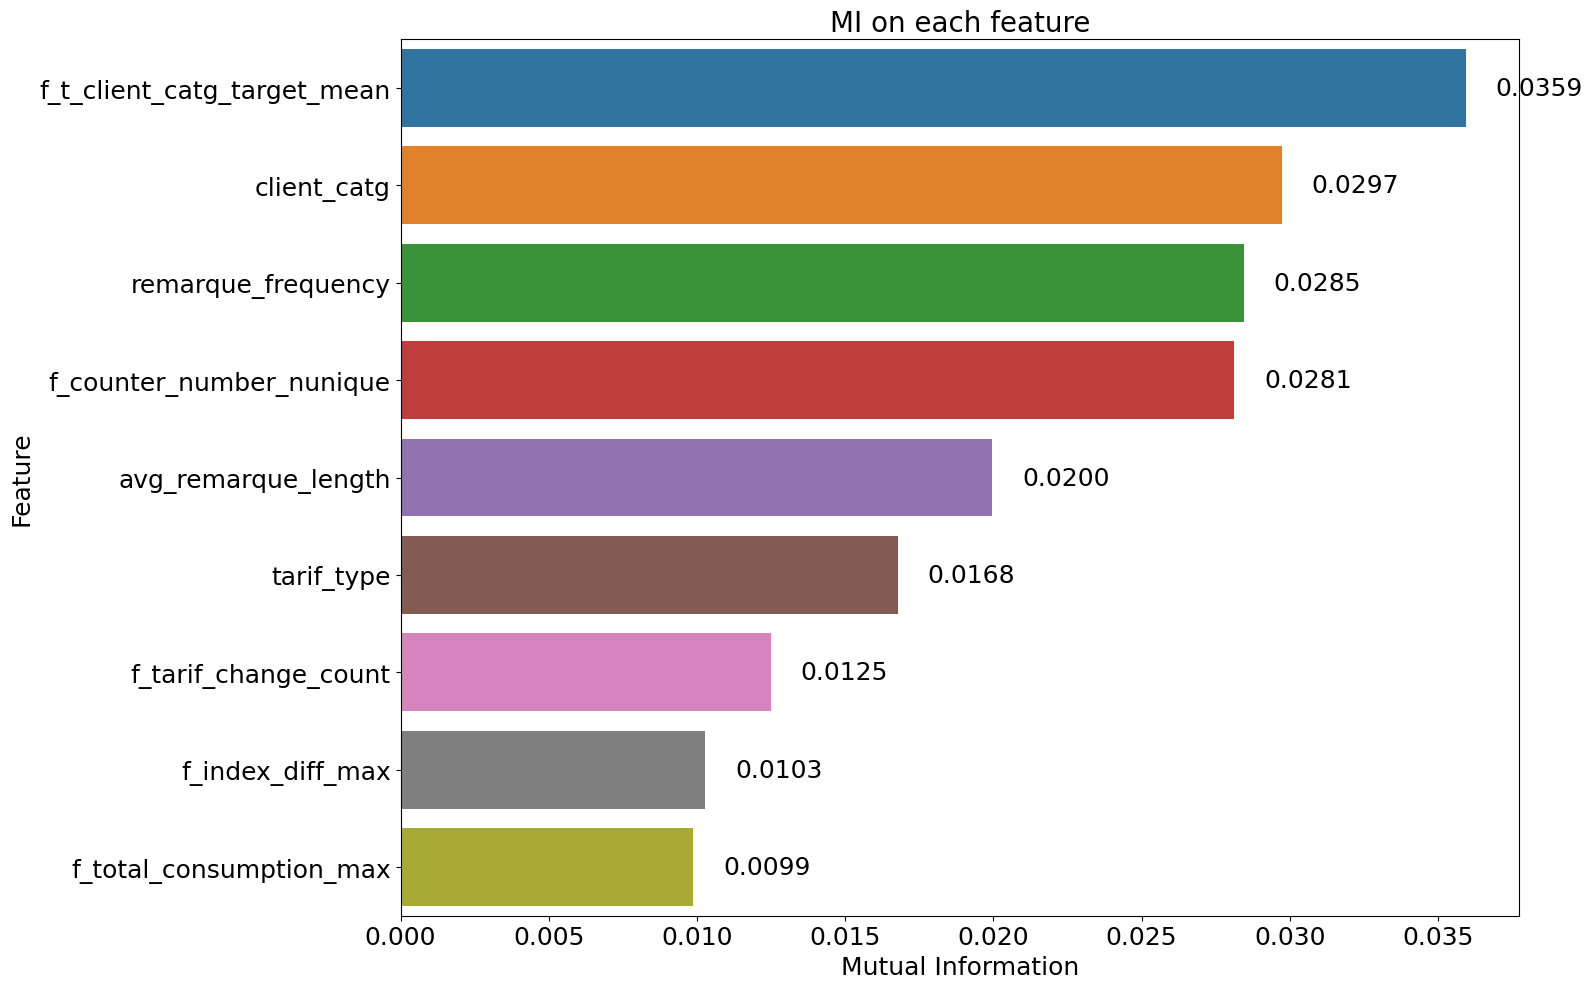

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
visualize_mutual_information(df_fraud_mutual_info, top_n=9)

In [5]:
# Save the mutual information DataFrame to a CSV file
df_fraud_mutual_info.to_csv("./data/mutual_information_fraud.csv", index=False)